In [ ]:
import pandas as pd
import numpy as np

file_path = "data/multi_asset_etf_data.xlsx"
returns = pd.read_excel(file_path, sheet_name="excess returns", index_col=0, parse_dates=[0])

returns.head()

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,,
2009-04-30,0.008440,-0.001554,0.155029,0.114637,0.137906,-0.028005,0.295598,0.229649,0.022329,0.098793,-0.018505
2009-05-31,0.054143,0.163134,0.159871,0.132390,0.029026,-0.020302,0.023198,0.054364,0.028337,0.058925,0.020438
2009-06-30,0.004550,-0.026858,-0.023093,-0.014648,0.032919,-0.006170,-0.025461,0.044850,-0.004035,-0.001253,0.001383
2009-07-31,0.031311,0.018594,0.110173,0.100441,0.069217,0.008344,0.105826,0.143275,0.015352,0.074632,0.000905
2009-08-31,0.007192,-0.040800,-0.013571,0.044595,-0.017405,0.007199,0.131503,0.032977,-0.004586,0.036504,0.007978


In [5]:
SCALE_MEAN = 12
SCALE_VOL = np.sqrt(12)
SCALE_SHARPE = np.sqrt(12)

mean_returns = returns.mean() * SCALE_MEAN
volatility = returns.std() * SCALE_VOL
sharpe_ratios = (returns.mean() / returns.std()) * SCALE_SHARPE

summary_stats = pd.DataFrame({
    "Annualized Mean": mean_returns,
    "Annualized Volatility": volatility,
    "Annualized Sharpe": sharpe_ratios
})
summary_stats_sorted = summary_stats.sort_values("Annualized Sharpe", ascending=False)
summary_stats_sorted.style.format("{:.2f}")

,Annualized Mean,Annualized Volatility,Annualized Sharpe
SPY,0.15,0.15,0.98
HYG,0.06,0.09,0.71
IYR,0.12,0.19,0.65
PSP,0.13,0.23,0.59
EFA,0.08,0.16,0.51
TIP,0.02,0.05,0.39
QAI,0.02,0.05,0.38
EEM,0.06,0.19,0.33
IEF,0.01,0.06,0.17
DBC,0.02,0.18,0.12


SPY has the best Sharpe ratio, of 0.98. HYG has the next best Sharpe ratio, of 0.71.

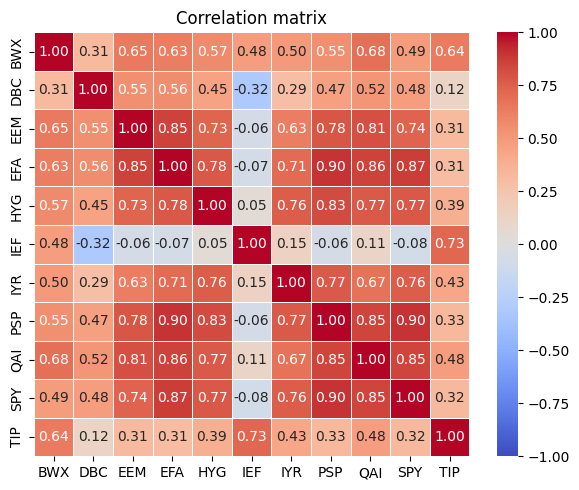

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = returns.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm",  vmin=-1, vmax=1, linewidths=0.7, annot_kws={"size": 10}, fmt=".2f")

plt.title("Correlation matrix")                                                    
plt.tight_layout()
